# WeatherPy
----

### Analysis
* As expected, the weather becomes significantly warmer as one approaches the equator (0 Deg. Latitude). More interestingly, however, is the fact that the southern hemisphere tends to be warmer this time of year than the northern hemisphere. This may be due to the tilt of the earth.
* There is no strong relationship between latitude and cloudiness. However, it is interesting to see that a strong band of cities sits at 0, 80, and 100% cloudiness.
* There is no strong relationship between latitude and wind speed. However, in northern hemispheres there is a flurry of cities with over 20 mph of wind.

---

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [36]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json
import datetime
import os
import csv

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

In [37]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

607

In [38]:
cities.sort()
print(f'{cities}')

['abu samrah', 'acajutla', 'acarau', 'adoni', 'adrar', 'aguilas', 'ahipara', 'airai', 'akdepe', 'akhmim', 'akure', 'albany', 'alice springs', 'alofi', 'aloleng', 'alotau', 'alta floresta', 'alugan', 'alvand', 'amapa', 'ambilobe', 'ambon', 'amderma', 'amga', 'anadyr', 'ancud', 'andenes', 'antofagasta', 'araouane', 'arlit', 'arraial do cabo', 'asau', 'asfi', 'atambua', 'atar', 'atbasar', 'attawapiskat', 'atuona', 'avarua', 'avera', 'awbari', 'ayagoz', 'aykhal', 'bacuit', 'bad salzdetfurth', 'bakel', 'bambanglipuro', 'bambari', 'bambous virieux', 'bandarbeyla', 'bara', 'baracoa', 'barentsburg', 'bargal', 'barrow', 'bathsheba', 'beatrice', 'belaya gora', 'beloha', 'belushya guba', 'bengkulu', 'bequimao', 'berdigestyakh', 'beringovskiy', 'berlevag', 'bermeo', 'bethel', 'betioky', 'bezhetsk', 'bhanpura', 'biak', 'bilibino', 'bima', 'birjand', 'bluff', 'boa vista', 'bocana de paiwas', 'bolungarvik', 'bossembele', 'bredasdorp', 'broken hill', 'broome', 'buala', 'bubaque', 'bud', 'buluang', 'bu

In [39]:
###
url = "http://api.openweathermap.org/data/2.5/weather?"
#query_url = url + "appid=" + api_key + "&q=" + city
query_url = url + "appid=" + api_key + "&q=" 
#cities = ["Paris", "London", "Oslo", "Beijing"]
#cities = ["aasiaat", "abalak"]

# set up lists to hold reponse info
id = []
cloud = []
country = []
date = []
humidity =[]
lat = []
lon = []
tempMax_k = []
tempMax_f = []
windSpeed = []
cityList=[]

# Loop through the list of cities and perform a request for data on each
for city in cities: 
        print(f'city is: {city}')
        response = requests.get(query_url + city).json()   
        print(f'{response}')
        try:
           id.append(response['id']),
           cityList.append(response['name']),
           cloud.append(response['clouds']['all'])
           country.append(response['sys']['country'])
           date.append(response['dt'])
           humidity.append(response['main']['humidity'])
           lat.append(response['coord']['lat'])
           lon.append(response['coord']['lon'])
           tempMax_k.append(response['main']['temp_max'])
           tempMax_f.append((response['main']['temp_max'] - 273.15)*9/5+32)
           windSpeed.append(response['wind']['speed'])
        except:
            print(f'not existing: {city}')
            time.sleep(0.2)
        time.sleep(0.2)
#print(f"The latitude information received is: {lat}")
#print(f"The temperature information received is: {tempMax}")


###
# create a data frame from cities, lat, and temp
weather_dict = {
    "city_id": id,
    "City": cityList,
    "Cloudiness": cloud,
    "Country": country,
    "Date": date,
    "Humidity": humidity,
    "Lat": lat,
    "Lng": lon,
    "Max Temp (Kelvin)": tempMax_k,
    "Max Temp (F)": tempMax_f,    
    "Wind Speed": windSpeed
}
weather_data = pd.DataFrame(weather_dict)
weather_data.head()

city is: abu samrah
{'coord': {'lon': 37.18, 'lat': 35.3}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 305.022, 'pressure': 1011.39, 'humidity': 22, 'temp_min': 305.022, 'temp_max': 305.022, 'sea_level': 1011.39, 'grnd_level': 967.49}, 'wind': {'speed': 9.7, 'deg': 284.333}, 'clouds': {'all': 89}, 'dt': 1559659095, 'sys': {'message': 0.0057, 'country': 'SY', 'sunrise': 1559614634, 'sunset': 1559666527}, 'timezone': 10800, 'id': 172515, 'name': 'Abu Samrah', 'cod': 200}
city is: acajutla
{'coord': {'lon': -89.83, 'lat': 13.59}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 303.322, 'pressure': 1013.7, 'humidity': 63, 'temp_min': 303.322, 'temp_max': 303.322, 'sea_level': 1013.7, 'grnd_level': 1013.4}, 'wind': {'speed': 2.84, 'deg': 114.069}, 'clouds': {'all': 60}, 'dt': 1559659095, 'sys': {'message': 0.0064, 'country': 'S

city is: alugan
{'coord': {'lon': 125.48, 'lat': 12.22}, 'weather': [{'id': 801, 'main': 'Clouds', 'description': 'few clouds', 'icon': '02n'}], 'base': 'stations', 'main': {'temp': 299.922, 'pressure': 1009.7, 'humidity': 84, 'temp_min': 299.922, 'temp_max': 299.922, 'sea_level': 1009.7, 'grnd_level': 1003.94}, 'wind': {'speed': 1.84, 'deg': 98.452}, 'clouds': {'all': 13}, 'dt': 1559659101, 'sys': {'message': 0.0055, 'country': 'PH', 'sunrise': 1559596338, 'sunset': 1559642434}, 'timezone': 28800, 'id': 1731248, 'name': 'Alugan', 'cod': 200}
city is: alvand
{'coord': {'lon': 50.06, 'lat': 36.19}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01d'}], 'base': 'stations', 'main': {'temp': 305.15, 'pressure': 1016, 'humidity': 18, 'temp_min': 305.15, 'temp_max': 305.15}, 'visibility': 10000, 'wind': {'speed': 2.1, 'deg': 230}, 'clouds': {'all': 0}, 'dt': 1559659101, 'sys': {'type': 1, 'id': 7465, 'message': 0.011, 'country': 'IR', 'sunrise': 1559611400, 'su

city is: attawapiskat
{'cod': '404', 'message': 'city not found'}
not existing: attawapiskat
city is: atuona
{'coord': {'lon': -139.03, 'lat': -9.8}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03n'}], 'base': 'stations', 'main': {'temp': 301.022, 'pressure': 1012.58, 'humidity': 77, 'temp_min': 301.022, 'temp_max': 301.022, 'sea_level': 1012.58, 'grnd_level': 1012.48}, 'wind': {'speed': 8.58, 'deg': 105.337}, 'clouds': {'all': 25}, 'dt': 1559659019, 'sys': {'message': 0.0052, 'country': 'PF', 'sunrise': 1559662039, 'sunset': 1559703713}, 'timezone': -34200, 'id': 4020109, 'name': 'Atuona', 'cod': 200}
city is: avarua
{'coord': {'lon': -159.78, 'lat': -21.21}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 296.15, 'pressure': 1014, 'humidity': 94, 'temp_min': 296.15, 'temp_max': 296.15}, 'visibility': 10000, 'wind': {'speed': 1, 'deg': 50}, 'clouds': {'all': 90},

city is: bathsheba
{'coord': {'lon': -59.52, 'lat': 13.22}, 'weather': [{'id': 801, 'main': 'Clouds', 'description': 'few clouds', 'icon': '02d'}], 'base': 'stations', 'main': {'temp': 304.15, 'pressure': 1017, 'humidity': 66, 'temp_min': 304.15, 'temp_max': 304.15}, 'visibility': 10000, 'wind': {'speed': 8.2, 'deg': 110}, 'clouds': {'all': 20}, 'dt': 1559658945, 'sys': {'type': 1, 'id': 8772, 'message': 0.0045, 'country': 'BB', 'sunrise': 1559640634, 'sunset': 1559686949}, 'timezone': -14400, 'id': 3374083, 'name': 'Bathsheba', 'cod': 200}
city is: beatrice
{'coord': {'lon': -96.75, 'lat': 40.27}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01d'}], 'base': 'stations', 'main': {'temp': 296.44, 'pressure': 1011, 'humidity': 88, 'temp_min': 294.26, 'temp_max': 298.15}, 'visibility': 16093, 'wind': {'speed': 3.1, 'deg': 170}, 'clouds': {'all': 1}, 'dt': 1559659116, 'sys': {'type': 1, 'id': 3437, 'message': 0.0062, 'country': 'US', 'sunrise': 1559645912, '

city is: birjand
{'coord': {'lon': 59.22, 'lat': 32.86}, 'weather': [{'id': 801, 'main': 'Clouds', 'description': 'few clouds', 'icon': '02d'}], 'base': 'stations', 'main': {'temp': 301.15, 'pressure': 1017, 'humidity': 11, 'temp_min': 301.15, 'temp_max': 301.15}, 'visibility': 10000, 'wind': {'speed': 6.2, 'deg': 360}, 'clouds': {'all': 20}, 'dt': 1559659122, 'sys': {'type': 1, 'id': 7481, 'message': 0.0067, 'country': 'IR', 'sunrise': 1559609722, 'sunset': 1559660859}, 'timezone': 16200, 'id': 140463, 'name': 'Birjand', 'cod': 200}
city is: bluff
{'coord': {'lon': 149.07, 'lat': -23.58}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 283.722, 'pressure': 1021.4, 'humidity': 48, 'temp_min': 283.722, 'temp_max': 283.722, 'sea_level': 1021.4, 'grnd_level': 995.56}, 'wind': {'speed': 5.19, 'deg': 179.04}, 'clouds': {'all': 95}, 'dt': 1559659123, 'sys': {'message': 0.005, 'country': 'AU', 'sunrise': 1559680

city is: cabo san lucas
{'coord': {'lon': -109.91, 'lat': 22.89}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03d'}], 'base': 'stations', 'main': {'temp': 296.12, 'pressure': 1012, 'humidity': 73, 'temp_min': 290.37, 'temp_max': 299.26}, 'visibility': 16093, 'wind': {'speed': 2.1, 'deg': 330}, 'clouds': {'all': 40}, 'dt': 1559659129, 'sys': {'type': 1, 'id': 7165, 'message': 0.0061, 'country': 'MX', 'sunrise': 1559651639, 'sunset': 1559700134}, 'timezone': -21600, 'id': 3985710, 'name': 'Cabo San Lucas', 'cod': 200}
city is: caborca
{'coord': {'lon': -111.1, 'lat': 30.58}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01d'}], 'base': 'stations', 'main': {'temp': 295.93, 'pressure': 1009, 'humidity': 40, 'temp_min': 295.93, 'temp_max': 295.93}, 'wind': {'speed': 0.45, 'deg': 67, 'gust': 0.89}, 'clouds': {'all': 0}, 'dt': 1559659129, 'sys': {'type': 3, 'id': 2012221, 'message': 0.0059, 'country': 'MX', 'sunrise': 1

city is: chase
{'coord': {'lon': -85.64, 'lat': 43.89}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01d'}], 'base': 'stations', 'main': {'temp': 292.65, 'pressure': 1015, 'humidity': 45, 'temp_min': 290.15, 'temp_max': 294.26}, 'visibility': 16093, 'wind': {'speed': 5.1, 'deg': 240}, 'clouds': {'all': 1}, 'dt': 1559659134, 'sys': {'type': 1, 'id': 3562, 'message': 0.0068, 'country': 'US', 'sunrise': 1559642519, 'sunset': 1559697603}, 'timezone': -14400, 'id': 5006946, 'name': 'Chase', 'cod': 200}
city is: cherskiy
{'coord': {'lon': 161.3, 'lat': 68.75}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01d'}], 'base': 'stations', 'main': {'temp': 271.222, 'pressure': 1018.36, 'humidity': 81, 'temp_min': 271.222, 'temp_max': 271.222, 'sea_level': 1018.36, 'grnd_level': 1017.46}, 'wind': {'speed': 6.09, 'deg': 6.478}, 'clouds': {'all': 0}, 'dt': 1559659134, 'sys': {'message': 0.0062, 'country': 'RU', 'sunrise': 0, 'sunset': 0}

city is: crossville
{'coord': {'lon': -85.03, 'lat': 35.95}, 'weather': [{'id': 721, 'main': 'Haze', 'description': 'haze', 'icon': '50d'}], 'base': 'stations', 'main': {'temp': 294.17, 'pressure': 1022, 'humidity': 52, 'temp_min': 292.15, 'temp_max': 295.37}, 'visibility': 16093, 'wind': {'speed': 2.6, 'deg': 120}, 'clouds': {'all': 1}, 'dt': 1559659139, 'sys': {'type': 1, 'id': 3713, 'message': 0.0063, 'country': 'US', 'sunrise': 1559643855, 'sunset': 1559695975}, 'timezone': -18000, 'id': 4616470, 'name': 'Crossville', 'cod': 200}
city is: cruz
{'coord': {'lon': -40.18, 'lat': -2.92}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 302.822, 'pressure': 1015.56, 'humidity': 67, 'temp_min': 302.822, 'temp_max': 302.822, 'sea_level': 1015.56, 'grnd_level': 1004.52}, 'wind': {'speed': 3.07, 'deg': 133.719}, 'clouds': {'all': 67}, 'dt': 1559659139, 'sys': {'message': 0.0045, 'country': 'BR', 'sunrise': 155963

city is: emerald
{'coord': {'lon': 148.16, 'lat': -23.53}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 280.34, 'pressure': 1021, 'humidity': 53, 'temp_min': 278.15, 'temp_max': 283.15}, 'visibility': 10000, 'wind': {'speed': 3.6, 'deg': 190}, 'clouds': {'all': 99}, 'dt': 1559659146, 'sys': {'type': 1, 'id': 9524, 'message': 0.0052, 'country': 'AU', 'sunrise': 1559681004, 'sunset': 1559719701}, 'timezone': 36000, 'id': 2167426, 'name': 'Emerald', 'cod': 200}
city is: esperance
{'coord': {'lon': -61.45, 'lat': 10.24}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 303.52, 'pressure': 1016, 'humidity': 70, 'temp_min': 303.15, 'temp_max': 304.26}, 'visibility': 10000, 'wind': {'speed': 7.2, 'deg': 120}, 'clouds': {'all': 75}, 'dt': 1559659146, 'sys': {'type': 1, 'id': 8810, 'message': 0.0053, 'country': 'TT', 'sunrise': 15596

city is: gisors
{'coord': {'lon': 1.78, 'lat': 49.28}, 'weather': [{'id': 501, 'main': 'Rain', 'description': 'moderate rain', 'icon': '10d'}], 'base': 'stations', 'main': {'temp': 298.83, 'pressure': 1002, 'humidity': 54, 'temp_min': 295.93, 'temp_max': 300.93}, 'visibility': 10000, 'wind': {'speed': 6.2, 'deg': 210}, 'rain': {'3h': 4.938}, 'clouds': {'all': 98}, 'dt': 1559659152, 'sys': {'type': 1, 'id': 6547, 'message': 0.0065, 'country': 'FR', 'sunrise': 1559620232, 'sunset': 1559677923}, 'timezone': 7200, 'id': 3015926, 'name': 'Gisors', 'cod': 200}
city is: gizo
{'coord': {'lon': 34.94, 'lat': 31.8}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01d'}], 'base': 'stations', 'main': {'temp': 301.87, 'pressure': 1012, 'humidity': 45, 'temp_min': 299.82, 'temp_max': 304.15}, 'visibility': 10000, 'wind': {'speed': 10.8, 'deg': 340}, 'clouds': {'all': 0}, 'dt': 1559659152, 'sys': {'type': 1, 'id': 6845, 'message': 0.0064, 'country': 'IL', 'sunrise': 1559

city is: havre-saint-pierre
{'coord': {'lon': -63.6, 'lat': 50.23}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 283.15, 'pressure': 1007, 'humidity': 87, 'temp_min': 283.15, 'temp_max': 283.15}, 'visibility': 14484, 'wind': {'speed': 5.1, 'deg': 220}, 'clouds': {'all': 90}, 'dt': 1559659159, 'sys': {'type': 1, 'id': 812, 'message': 0.0055, 'country': 'CA', 'sunrise': 1559635647, 'sunset': 1559693894}, 'timezone': -14400, 'id': 5972291, 'name': 'Havre-Saint-Pierre', 'cod': 200}
city is: henties bay
{'coord': {'lon': 14.28, 'lat': -22.12}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01d'}], 'base': 'stations', 'main': {'temp': 288.922, 'pressure': 1016.93, 'humidity': 71, 'temp_min': 288.922, 'temp_max': 288.922, 'sea_level': 1016.93, 'grnd_level': 1017.08}, 'wind': {'speed': 5.56, 'deg': 173.52}, 'clouds': {'all': 0}, 'dt': 1559659159, 'sys': {'message': 0.0063, 'count

city is: hualmay
{'coord': {'lon': -77.61, 'lat': -11.1}, 'weather': [{'id': 500, 'main': 'Rain', 'description': 'light rain', 'icon': '10d'}], 'base': 'stations', 'main': {'temp': 289.822, 'pressure': 1017.34, 'humidity': 92, 'temp_min': 289.822, 'temp_max': 289.822, 'sea_level': 1017.34, 'grnd_level': 1016.12}, 'wind': {'speed': 5.17, 'deg': 162.228}, 'rain': {'3h': 0.188}, 'clouds': {'all': 100}, 'dt': 1559659167, 'sys': {'message': 0.0051, 'country': 'PE', 'sunrise': 1559647428, 'sunset': 1559688839}, 'timezone': -18000, 'id': 3939761, 'name': 'Hualmay', 'cod': 200}
city is: huilong
{'coord': {'lon': 110.18, 'lat': 28.89}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 295.722, 'pressure': 1004.9, 'humidity': 71, 'temp_min': 295.722, 'temp_max': 295.722, 'sea_level': 1004.9, 'grnd_level': 940.84}, 'wind': {'speed': 0.98, 'deg': 116.643}, 'clouds': {'all': 100}, 'dt': 1559659168, 'sys': {'message': 0.

city is: iskandar
{'coord': {'lon': 46.58, 'lat': 38.02}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03d'}], 'base': 'stations', 'main': {'temp': 304.15, 'pressure': 1018, 'humidity': 22, 'temp_min': 304.15, 'temp_max': 304.15}, 'visibility': 10000, 'wind': {'speed': 4.1, 'deg': 250}, 'clouds': {'all': 40}, 'dt': 1559659173, 'sys': {'type': 1, 'id': 7509, 'message': 0.0054, 'country': 'IR', 'sunrise': 1559611926, 'sunset': 1559664723}, 'timezone': 16200, 'id': 142549, 'name': 'Iskandar', 'cod': 200}
city is: itarema
{'coord': {'lon': -39.92, 'lat': -2.92}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 303.022, 'pressure': 1015.6, 'humidity': 66, 'temp_min': 303.022, 'temp_max': 303.022, 'sea_level': 1015.6, 'grnd_level': 1012.13}, 'wind': {'speed': 3.29, 'deg': 129.482}, 'clouds': {'all': 92}, 'dt': 1559659174, 'sys': {'message': 0.006, 'country': 'BR', 'sunris

city is: kaduqli
{'coord': {'lon': 29.72, 'lat': 11.01}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 307.122, 'pressure': 1005.99, 'humidity': 35, 'temp_min': 307.122, 'temp_max': 307.122, 'sea_level': 1005.99, 'grnd_level': 945.27}, 'wind': {'speed': 2.51, 'deg': 230.063}, 'clouds': {'all': 92}, 'dt': 1559659179, 'sys': {'message': 0.0047, 'country': 'SD', 'sunrise': 1559619448, 'sunset': 1559665295}, 'timezone': 7200, 'id': 373141, 'name': 'Kaduqli', 'cod': 200}
city is: kaeo
{'coord': {'lon': 173.78, 'lat': -35.1}, 'weather': [{'id': 500, 'main': 'Rain', 'description': 'light rain', 'icon': '10n'}], 'base': 'stations', 'main': {'temp': 284.26, 'pressure': 1006, 'humidity': 94, 'temp_min': 284.26, 'temp_max': 284.26}, 'wind': {'speed': 7.25, 'deg': 2.823}, 'rain': {'3h': 0.562}, 'clouds': {'all': 95}, 'dt': 1559659096, 'sys': {'type': 3, 'id': 2012217, 'message': 0.0043, 'country': 'NZ', 'sunrise': 

city is: kavaratti
{'coord': {'lon': 72.64, 'lat': 10.57}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 303.422, 'pressure': 1006.7, 'humidity': 72, 'temp_min': 303.422, 'temp_max': 303.422, 'sea_level': 1006.7, 'grnd_level': 1007.11}, 'wind': {'speed': 4.89, 'deg': 345.646}, 'clouds': {'all': 97}, 'dt': 1559659185, 'sys': {'message': 0.0056, 'country': 'IN', 'sunrise': 1559609192, 'sunset': 1559654947}, 'timezone': 19800, 'id': 1267390, 'name': 'Kavaratti', 'cod': 200}
city is: kavieng
{'coord': {'lon': 150.8, 'lat': -2.57}, 'weather': [{'id': 500, 'main': 'Rain', 'description': 'light rain', 'icon': '10n'}], 'base': 'stations', 'main': {'temp': 301.422, 'pressure': 1007.19, 'humidity': 76, 'temp_min': 301.422, 'temp_max': 301.422, 'sea_level': 1007.19, 'grnd_level': 1007.11}, 'wind': {'speed': 2.25, 'deg': 157.372}, 'rain': {'3h': 1.938}, 'clouds': {'all': 79}, 'dt': 1559659185, 'sys': {'message': 0.

city is: klaksvik
{'coord': {'lon': -6.59, 'lat': 62.23}, 'weather': [{'id': 701, 'main': 'Mist', 'description': 'mist', 'icon': '50d'}], 'base': 'stations', 'main': {'temp': 279.15, 'pressure': 998, 'humidity': 93, 'temp_min': 279.15, 'temp_max': 279.15}, 'wind': {'speed': 14.9, 'deg': 260}, 'clouds': {'all': 100}, 'dt': 1559659034, 'sys': {'type': 1, 'id': 1596, 'message': 0.0066, 'country': 'FO', 'sunrise': 1559616351, 'sunset': 1559685822}, 'timezone': 3600, 'id': 2618795, 'name': 'Klaksvik', 'cod': 200}
city is: kloulklubed
{'coord': {'lon': 134.26, 'lat': 7.04}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 298.15, 'pressure': 1009, 'humidity': 94, 'temp_min': 298.15, 'temp_max': 298.15}, 'visibility': 22530, 'wind': {'speed': 2.39, 'deg': 63.189}, 'clouds': {'all': 75}, 'dt': 1559659190, 'sys': {'type': 1, 'id': 7901, 'message': 0.005, 'country': 'PW', 'sunrise': 1559594763, 'sunset': 1559639795}, 

city is: kununurra
{'coord': {'lon': 128.74, 'lat': -15.77}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 295.15, 'pressure': 1018, 'humidity': 19, 'temp_min': 295.15, 'temp_max': 295.15}, 'visibility': 10000, 'wind': {'speed': 6.2, 'deg': 140}, 'clouds': {'all': 100}, 'dt': 1559659196, 'sys': {'type': 1, 'id': 9587, 'message': 0.0053, 'country': 'AU', 'sunrise': 1559598380, 'sunset': 1559638828}, 'timezone': 28800, 'id': 2068110, 'name': 'Kununurra', 'cod': 200}
city is: la ronge
{'coord': {'lon': -105.3, 'lat': 55.1}, 'weather': [{'id': 801, 'main': 'Clouds', 'description': 'few clouds', 'icon': '02d'}], 'base': 'stations', 'main': {'temp': 286.15, 'pressure': 1007, 'humidity': 71, 'temp_min': 286.15, 'temp_max': 286.15}, 'visibility': 24140, 'wind': {'speed': 5.1, 'deg': 280}, 'clouds': {'all': 20}, 'dt': 1559659197, 'sys': {'type': 1, 'id': 949, 'message': 0.0053, 'country': 'CA', 'sunrise': 155964

city is: letterkenny
{'coord': {'lon': -7.73, 'lat': 54.95}, 'weather': [{'id': 501, 'main': 'Rain', 'description': 'moderate rain', 'icon': '10d'}], 'base': 'stations', 'main': {'temp': 285.15, 'pressure': 1005, 'humidity': 71, 'temp_min': 285.15, 'temp_max': 285.15}, 'visibility': 10000, 'wind': {'speed': 7.7, 'deg': 40}, 'clouds': {'all': 20}, 'dt': 1559659202, 'sys': {'type': 1, 'id': 1550, 'message': 0.0052, 'country': 'IE', 'sunrise': 1559620654, 'sunset': 1559682067}, 'timezone': 3600, 'id': 2962961, 'name': 'Letterkenny', 'cod': 200}
city is: lhokseumawe
{'coord': {'lon': 97.15, 'lat': 5.18}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 296.822, 'pressure': 1009.66, 'humidity': 93, 'temp_min': 296.822, 'temp_max': 296.822, 'sea_level': 1009.66, 'grnd_level': 965.8}, 'wind': {'speed': 0.58, 'deg': 169.368}, 'clouds': {'all': 99}, 'dt': 1559659202, 'sys': {'message': 0.0066, 'country': 'ID', 'sun

city is: louisbourg
{'cod': '404', 'message': 'city not found'}
not existing: louisbourg
city is: luan
{'coord': {'lon': 6.98, 'lat': 46.36}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01d'}], 'base': 'stations', 'main': {'temp': 300.88, 'pressure': 1009, 'humidity': 39, 'temp_min': 296.48, 'temp_max': 305.15}, 'visibility': 10000, 'wind': {'speed': 1}, 'clouds': {'all': 0}, 'dt': 1559659207, 'sys': {'type': 1, 'id': 6928, 'message': 0.0063, 'country': 'CH', 'sunrise': 1559619736, 'sunset': 1559675923}, 'timezone': 7200, 'id': 2659977, 'name': 'Luan', 'cod': 200}
city is: luanda
{'coord': {'lon': 13.24, 'lat': -8.83}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01d'}], 'base': 'stations', 'main': {'temp': 299.15, 'pressure': 1011, 'humidity': 69, 'temp_min': 299.15, 'temp_max': 299.15}, 'visibility': 10000, 'wind': {'speed': 7.2, 'deg': 260}, 'clouds': {'all': 0}, 'dt': 1559659208, 'sys': {'type': 1, 'id': 2173, 'mess

city is: manjeshwar
{'coord': {'lon': 74.89, 'lat': 12.72}, 'weather': [{'id': 801, 'main': 'Clouds', 'description': 'few clouds', 'icon': '02n'}], 'base': 'stations', 'main': {'temp': 303.15, 'pressure': 1006, 'humidity': 70, 'temp_min': 303.15, 'temp_max': 303.15}, 'visibility': 6000, 'wind': {'speed': 2.1, 'deg': 290}, 'clouds': {'all': 20}, 'dt': 1559659212, 'sys': {'type': 1, 'id': 9217, 'message': 0.0054, 'country': 'IN', 'sunrise': 1559608428, 'sunset': 1559654631}, 'timezone': 19800, 'id': 1263780, 'name': 'Manjeshwar', 'cod': 200}
city is: manokwari
{'coord': {'lon': 134.08, 'lat': -0.87}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 297.022, 'pressure': 1009.49, 'humidity': 76, 'temp_min': 297.022, 'temp_max': 297.022, 'sea_level': 1009.49, 'grnd_level': 956.16}, 'wind': {'speed': 1.05, 'deg': 191.149}, 'clouds': {'all': 86}, 'dt': 1559659213, 'sys': {'message': 0.0048, 'country': 'ID', 'sunr

{'coord': {'lon': -135.9, 'lat': 63.59}, 'weather': [{'id': 801, 'main': 'Clouds', 'description': 'few clouds', 'icon': '02d'}], 'base': 'stations', 'main': {'temp': 282.15, 'pressure': 1012, 'humidity': 54, 'temp_min': 282.15, 'temp_max': 282.15}, 'visibility': 32186, 'wind': {'speed': 2.6, 'deg': 20}, 'clouds': {'all': 20}, 'dt': 1559659218, 'sys': {'type': 1, 'id': 858, 'message': 0.0071, 'country': 'CA', 'sunrise': 1559646098, 'sunset': 1559718152}, 'timezone': -25200, 'id': 6068416, 'name': 'Mayo', 'cod': 200}
city is: meadow lake
{'coord': {'lon': -108.44, 'lat': 54.13}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01d'}], 'base': 'stations', 'main': {'temp': 286.15, 'pressure': 1011, 'humidity': 62, 'temp_min': 286.15, 'temp_max': 286.15}, 'visibility': 24140, 'wind': {'speed': 6.2, 'deg': 270, 'gust': 8.7}, 'clouds': {'all': 5}, 'dt': 1559659218, 'sys': {'type': 1, 'id': 833, 'message': 0.0063, 'country': 'CA', 'sunrise': 1559645123, 'sunset': 1

city is: moscow
{'coord': {'lon': 37.62, 'lat': 55.75}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01d'}], 'base': 'stations', 'main': {'temp': 295.75, 'pressure': 1023, 'humidity': 33, 'temp_min': 295.15, 'temp_max': 296.15}, 'visibility': 10000, 'wind': {'speed': 2, 'deg': 130}, 'clouds': {'all': 0}, 'dt': 1559659011, 'sys': {'type': 1, 'id': 9029, 'message': 0.0057, 'country': 'RU', 'sunrise': 1559609453, 'sunset': 1559671497}, 'timezone': 10800, 'id': 524901, 'name': 'Moscow', 'cod': 200}
city is: mount gambier
{'coord': {'lon': 140.78, 'lat': -37.83}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 279.15, 'pressure': 1034, 'humidity': 93, 'temp_min': 279.15, 'temp_max': 279.15}, 'visibility': 10000, 'wind': {'speed': 2.1, 'deg': 290}, 'clouds': {'all': 90}, 'dt': 1559659224, 'sys': {'type': 1, 'id': 9560, 'message': 0.0048, 'country': 'AU', 'sunrise': 1559684733, '

city is: nanded
{'cod': '404', 'message': 'city not found'}
not existing: nanded
city is: nanortalik
{'coord': {'lon': -45.24, 'lat': 60.14}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 278.422, 'pressure': 1021.93, 'humidity': 70, 'temp_min': 278.422, 'temp_max': 278.422, 'sea_level': 1021.93, 'grnd_level': 1018.48}, 'wind': {'speed': 3.85, 'deg': 234.558}, 'clouds': {'all': 55}, 'dt': 1559659111, 'sys': {'message': 0.0059, 'country': 'GL', 'sunrise': 1559627103, 'sunset': 1559693624}, 'timezone': -7200, 'id': 3421765, 'name': 'Nanortalik', 'cod': 200}
city is: nantucket
{'coord': {'lon': -70.1, 'lat': 41.28}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01d'}], 'base': 'stations', 'main': {'temp': 289.75, 'pressure': 1019, 'humidity': 59, 'temp_min': 287.59, 'temp_max': 291.48}, 'visibility': 16093, 'wind': {'speed': 6.7, 'deg': 230}, 'clouds': {'all': 1}, 'dt': 155965

city is: norman wells
{'coord': {'lon': -126.83, 'lat': 65.28}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 279.15, 'pressure': 1016, 'humidity': 70, 'temp_min': 279.15, 'temp_max': 279.15}, 'visibility': 48279, 'wind': {'speed': 2.1, 'deg': 310}, 'clouds': {'all': 75}, 'dt': 1559659236, 'sys': {'type': 1, 'id': 951, 'message': 0.0058, 'country': 'CA', 'sunrise': 1559641748, 'sunset': 1559718147}, 'timezone': -21600, 'id': 6089245, 'name': 'Norman Wells', 'cod': 200}
city is: northam
{'coord': {'lon': -4.21, 'lat': 51.04}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03d'}], 'base': 'stations', 'main': {'temp': 287.57, 'pressure': 1002, 'humidity': 87, 'temp_min': 284.82, 'temp_max': 289.82}, 'visibility': 10000, 'wind': {'speed': 4.1, 'deg': 180}, 'clouds': {'all': 40}, 'dt': 1559659236, 'sys': {'type': 1, 'id': 1472, 'message': 0.0056, 'country': 'GB', 'sunrise

city is: paamiut
{'coord': {'lon': -49.67, 'lat': 61.99}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 276.422, 'pressure': 1021.32, 'humidity': 82, 'temp_min': 276.422, 'temp_max': 276.422, 'sea_level': 1021.32, 'grnd_level': 1021.49}, 'wind': {'speed': 4.52, 'deg': 297.965}, 'clouds': {'all': 85}, 'dt': 1559659242, 'sys': {'message': 0.0046, 'country': 'GL', 'sunrise': 1559626871, 'sunset': 1559695983}, 'timezone': -7200, 'id': 3421193, 'name': 'Paamiut', 'cod': 200}
city is: padang
{'coord': {'lon': 100.36, 'lat': -0.92}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 302.522, 'pressure': 1009.57, 'humidity': 71, 'temp_min': 302.522, 'temp_max': 302.522, 'sea_level': 1009.57, 'grnd_level': 1008.42}, 'wind': {'speed': 1.55, 'deg': 202.041}, 'clouds': {'all': 100}, 'dt': 1559659163, 'sys': {'message': 0.0054, 'country':

city is: pemangkat
{'cod': '404', 'message': 'city not found'}
not existing: pemangkat
city is: penzance
{'coord': {'lon': -5.53, 'lat': 50.12}, 'weather': [{'id': 801, 'main': 'Clouds', 'description': 'few clouds', 'icon': '02d'}], 'base': 'stations', 'main': {'temp': 287.73, 'pressure': 1002, 'humidity': 87, 'temp_min': 286.15, 'temp_max': 288.71}, 'visibility': 10000, 'wind': {'speed': 4.1, 'deg': 220}, 'clouds': {'all': 20}, 'dt': 1559659019, 'sys': {'type': 1, 'id': 1389, 'message': 0.0059, 'country': 'GB', 'sunrise': 1559621748, 'sunset': 1559679916}, 'timezone': 3600, 'id': 2640377, 'name': 'Penzance', 'cod': 200}
city is: peskovka
{'coord': {'lon': 52.36, 'lat': 59.04}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01d'}], 'base': 'stations', 'main': {'temp': 286.622, 'pressure': 1018.33, 'humidity': 43, 'temp_min': 286.622, 'temp_max': 286.622, 'sea_level': 1018.33, 'grnd_level': 995.48}, 'wind': {'speed': 4.57, 'deg': 333.457}, 'clouds': {'all'

city is: port macquarie
{'coord': {'lon': 152.91, 'lat': -31.43}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 285.6, 'pressure': 1018, 'humidity': 87, 'temp_min': 283.15, 'temp_max': 287.59}, 'visibility': 10000, 'wind': {'speed': 5.7, 'deg': 260}, 'clouds': {'all': 75}, 'dt': 1559659108, 'sys': {'type': 1, 'id': 9610, 'message': 0.0051, 'country': 'AU', 'sunrise': 1559680865, 'sunset': 1559717560}, 'timezone': 36000, 'id': 2152659, 'name': 'Port Macquarie', 'cod': 200}
city is: poya
{'coord': {'lon': 165.16, 'lat': -21.35}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 297.022, 'pressure': 1013.26, 'humidity': 74, 'temp_min': 297.022, 'temp_max': 297.022, 'sea_level': 1013.26, 'grnd_level': 1015.6}, 'wind': {'speed': 3.46, 'deg': 21.11}, 'clouds': {'all': 83}, 'dt': 1559659254, 'sys': {'message': 0.0044, 'country': 'NC', 

city is: pula
{'coord': {'lon': -79.93, 'lat': -1.95}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 297.76, 'pressure': 1012, 'humidity': 83, 'temp_min': 297.59, 'temp_max': 298.15}, 'visibility': 10000, 'wind': {'speed': 3.6, 'deg': 210}, 'clouds': {'all': 75}, 'dt': 1559659259, 'sys': {'type': 1, 'id': 8534, 'message': 0.0051, 'country': 'EC', 'sunrise': 1559647068, 'sunset': 1559690313}, 'timezone': -18000, 'id': 3658053, 'name': 'Pula', 'cod': 200}
city is: punta arenas
{'coord': {'lon': -70.91, 'lat': -53.16}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 278.15, 'pressure': 991, 'humidity': 86, 'temp_min': 278.15, 'temp_max': 278.15}, 'visibility': 10000, 'wind': {'speed': 4.1, 'deg': 150}, 'clouds': {'all': 75}, 'dt': 1559659259, 'sys': {'type': 1, 'id': 8487, 'message': 0.0053, 'country': 'CL', 'sunrise': 1559652520

city is: sabang
{'coord': {'lon': 123.58, 'lat': 13.72}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03n'}], 'base': 'stations', 'main': {'temp': 302.422, 'pressure': 1010.01, 'humidity': 73, 'temp_min': 302.422, 'temp_max': 302.422, 'sea_level': 1010.01, 'grnd_level': 1007.68}, 'wind': {'speed': 4.48, 'deg': 108.366}, 'clouds': {'all': 48}, 'dt': 1559659028, 'sys': {'message': 0.0056, 'country': 'PH', 'sunrise': 1559596636, 'sunset': 1559643049}, 'timezone': 28800, 'id': 1691355, 'name': 'Sabang', 'cod': 200}
city is: saint anthony
{'coord': {'lon': -111.68, 'lat': 43.97}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01d'}], 'base': 'stations', 'main': {'temp': 286.94, 'pressure': 1020, 'humidity': 76, 'temp_min': 284.15, 'temp_max': 289.26}, 'visibility': 16093, 'wind': {'speed': 1.5, 'deg': 10}, 'clouds': {'all': 1}, 'dt': 1559659264, 'sys': {'type': 1, 'id': 5735, 'message': 0.017, 'country': 'US', 'sunrise'

city is: santa cruz del sur
{'coord': {'lon': -78, 'lat': 20.71}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01d'}], 'base': 'stations', 'main': {'temp': 303.822, 'pressure': 1016.46, 'humidity': 59, 'temp_min': 303.822, 'temp_max': 303.822, 'sea_level': 1016.46, 'grnd_level': 1011.51}, 'wind': {'speed': 2.25, 'deg': 95.617}, 'clouds': {'all': 7}, 'dt': 1559659272, 'sys': {'message': 0.0046, 'country': 'CU', 'sunrise': 1559644239, 'sunset': 1559692215}, 'timezone': -14400, 'id': 3537840, 'name': 'Santa Cruz del Sur', 'cod': 200}
city is: santa maria
{'coord': {'lon': -53.81, 'lat': -29.69}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 288.522, 'pressure': 1027.54, 'humidity': 82, 'temp_min': 288.522, 'temp_max': 288.522, 'sea_level': 1027.54, 'grnd_level': 1019.72}, 'wind': {'speed': 2.58, 'deg': 57.135}, 'clouds': {'all': 66}, 'dt': 1559659273, 'sys': {'message': 0.007

city is: shenzhen
{'coord': {'lon': 114.05, 'lat': 22.54}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 300.54, 'pressure': 1008, 'humidity': 88, 'temp_min': 299.82, 'temp_max': 301.48}, 'visibility': 10000, 'wind': {'speed': 1}, 'clouds': {'all': 75}, 'dt': 1559659279, 'sys': {'type': 1, 'id': 9630, 'message': 0.0069, 'country': 'CN', 'sunrise': 1559597933, 'sunset': 1559646326}, 'timezone': 28800, 'id': 1795565, 'name': 'Shenzhen', 'cod': 200}
city is: shibetsu
{'coord': {'lon': 142.46, 'lat': 44.15}, 'weather': [{'id': 500, 'main': 'Rain', 'description': 'light rain', 'icon': '10n'}], 'base': 'stations', 'main': {'temp': 284.822, 'pressure': 1010.05, 'humidity': 99, 'temp_min': 284.822, 'temp_max': 284.822, 'sea_level': 1010.05, 'grnd_level': 969.27}, 'wind': {'speed': 0.4, 'deg': 34.523}, 'rain': {'3h': 0.188}, 'clouds': {'all': 96}, 'dt': 1559659280, 'sys': {'message': 0.0067, 'country': 'JP', 'sunr

city is: sorland
{'coord': {'lon': 12.69, 'lat': 67.67}, 'weather': [{'id': 311, 'main': 'Drizzle', 'description': 'drizzle rain', 'icon': '09d'}], 'base': 'stations', 'main': {'temp': 282.48, 'pressure': 1009, 'humidity': 100, 'temp_min': 282.15, 'temp_max': 283.15}, 'wind': {'speed': 4.6, 'deg': 210}, 'clouds': {'all': 90}, 'dt': 1559659088, 'sys': {'type': 1, 'id': 1707, 'message': 0.0054, 'country': 'NO', 'sunrise': 0, 'sunset': 0}, 'timezone': 7200, 'id': 3137469, 'name': 'Sorland', 'cod': 200}
city is: sorong
{'coord': {'lon': 131.25, 'lat': -0.86}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 297.522, 'pressure': 1009.41, 'humidity': 95, 'temp_min': 297.522, 'temp_max': 297.522, 'sea_level': 1009.41, 'grnd_level': 1002.87}, 'wind': {'speed': 1.39, 'deg': 161.682}, 'clouds': {'all': 100}, 'dt': 1559659285, 'sys': {'message': 0.0049, 'country': 'ID', 'sunrise': 1559596271, 'sunset': 1559639732}, '

city is: tammisaari
{'cod': '404', 'message': 'city not found'}
not existing: tammisaari
city is: tangshan
{'coord': {'lon': 118.17, 'lat': 39.63}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 292.622, 'pressure': 1007.43, 'humidity': 69, 'temp_min': 292.622, 'temp_max': 292.622, 'sea_level': 1007.43, 'grnd_level': 1006.96}, 'wind': {'speed': 2.87, 'deg': 92.197}, 'clouds': {'all': 100}, 'dt': 1559659291, 'sys': {'message': 0.0062, 'country': 'CN', 'sunrise': 1559594462, 'sunset': 1559647820}, 'timezone': 28800, 'id': 1793346, 'name': 'Tangshan', 'cod': 200}
city is: tanshui
{'cod': '404', 'message': 'city not found'}
not existing: tanshui
city is: taolanaro
{'cod': '404', 'message': 'city not found'}
not existing: taolanaro
city is: taoudenni
{'coord': {'lon': -3.98, 'lat': 22.68}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01d'}], 'base': 'stations', 'main': {'temp'

city is: toliary
{'cod': '404', 'message': 'city not found'}
not existing: toliary
city is: topeka
{'coord': {'lon': -95.68, 'lat': 39.05}, 'weather': [{'id': 801, 'main': 'Clouds', 'description': 'few clouds', 'icon': '02d'}], 'base': 'stations', 'main': {'temp': 296.65, 'pressure': 1012, 'humidity': 83, 'temp_min': 295.37, 'temp_max': 298.15}, 'visibility': 16093, 'wind': {'speed': 2.6, 'deg': 170}, 'clouds': {'all': 20}, 'dt': 1559659045, 'sys': {'type': 1, 'id': 6052, 'message': 0.0068, 'country': 'US', 'sunrise': 1559645880, 'sunset': 1559699062}, 'timezone': -18000, 'id': 4280539, 'name': 'Topeka', 'cod': 200}
city is: torbay
{'coord': {'lon': -52.73, 'lat': 47.66}, 'weather': [{'id': 501, 'main': 'Rain', 'description': 'moderate rain', 'icon': '10d'}], 'base': 'stations', 'main': {'temp': 289.75, 'pressure': 1016, 'humidity': 93, 'temp_min': 287.59, 'temp_max': 293.15}, 'visibility': 24140, 'wind': {'speed': 6.2, 'deg': 210}, 'rain': {'1h': 1.78}, 'clouds': {'all': 75}, 'dt': 15

city is: ushuaia
{'coord': {'lon': -68.31, 'lat': -54.81}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03d'}], 'base': 'stations', 'main': {'temp': 279.15, 'pressure': 992, 'humidity': 75, 'temp_min': 279.15, 'temp_max': 279.15}, 'visibility': 10000, 'wind': {'speed': 2.1, 'deg': 270}, 'clouds': {'all': 40}, 'dt': 1559659306, 'sys': {'type': 1, 'id': 8303, 'message': 0.0053, 'country': 'AR', 'sunrise': 1559652441, 'sunset': 1559679362}, 'timezone': -10800, 'id': 3833367, 'name': 'Ushuaia', 'cod': 200}
city is: ust-maya
{'coord': {'lon': 134.54, 'lat': 60.42}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 284.622, 'pressure': 1007.91, 'humidity': 69, 'temp_min': 284.622, 'temp_max': 284.622, 'sea_level': 1007.91, 'grnd_level': 982.55}, 'wind': {'speed': 0.13, 'deg': 247.878}, 'clouds': {'all': 0}, 'dt': 1559659306, 'sys': {'message': 0.005, 'country': 'RU', 'sunrise': 1

city is: wah
{'cod': '404', 'message': 'city not found'}
not existing: wah
city is: walvis bay
{'coord': {'lon': 14.51, 'lat': -22.95}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01d'}], 'base': 'stations', 'main': {'temp': 295.15, 'pressure': 1018, 'humidity': 43, 'temp_min': 295.15, 'temp_max': 295.15}, 'visibility': 10000, 'wind': {'speed': 3.6, 'deg': 250}, 'clouds': {'all': 0}, 'dt': 1559659056, 'sys': {'type': 1, 'id': 2288, 'message': 0.0055, 'country': 'NA', 'sunrise': 1559626597, 'sunset': 1559665448}, 'timezone': 7200, 'id': 3359638, 'name': 'Walvis Bay', 'cod': 200}
city is: warqla
{'cod': '404', 'message': 'city not found'}
not existing: warqla
city is: westport
{'coord': {'lon': -9.52, 'lat': 53.8}, 'weather': [{'id': 500, 'main': 'Rain', 'description': 'light rain', 'icon': '10d'}], 'base': 'stations', 'main': {'temp': 284.02, 'pressure': 1003, 'humidity': 93, 'temp_min': 283.15, 'temp_max': 285.37}, 'visibility': 10000, 'wind': {'speed'

city is: zverinogolovskoye
{'coord': {'lon': 64.85, 'lat': 54.46}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01d'}], 'base': 'stations', 'main': {'temp': 286.922, 'pressure': 1001.04, 'humidity': 65, 'temp_min': 286.922, 'temp_max': 286.922, 'sea_level': 1001.04, 'grnd_level': 988.98}, 'wind': {'speed': 7.84, 'deg': 280.216}, 'clouds': {'all': 3}, 'dt': 1559659320, 'sys': {'message': 0.0046, 'country': 'RU', 'sunrise': 1559603433, 'sunset': 1559664445}, 'timezone': 18000, 'id': 1484943, 'name': 'Zverinogolovskoye', 'cod': 200}


,city_id,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp (Kelvin),Max Temp (F),Wind Speed
0,172515,Abu Samrah,89,SY,1559659095,22,35.30,37.18,305.022,89.3696,9.70
1,3587498,Acajutla,60,SV,1559659095,63,13.59,-89.83,303.322,86.3096,2.84
2,1279335,Adoni,100,IN,1559659096,33,15.63,77.27,309.722,97.8296,2.47
3,2508813,Adrar,0,DZ,1559659096,7,27.87,-0.29,314.150,105.8000,5.10
4,2522333,Aguilas,0,ES,1559659096,31,37.41,-1.58,305.150,89.6000,2.60


In [41]:
weather_data.count()

city_id              539
City                 539
Cloudiness           539
Country              539
Date                 539
Humidity             539
Lat                  539
Lng                  539
Max Temp (Kelvin)    539
Max Temp (F)         539
Wind Speed           539
dtype: int64

In [42]:
print(type(weather_data))

<class 'pandas.core.frame.DataFrame'>


In [43]:
###
unix_time=int(weather_data['Date'].max())
# local_time = time.localtime(unix_time, '%Y%m%d%H%M%S')
#datetime.datetime.today().strftime('%Y-%m-%d').strftime('%Y-%m-%d %H:%M:%S')
dt=datetime.datetime.fromtimestamp(unix_time).strftime('%m/%d/%Y %H:%M:%S')
local_date=dt.split(' ', 1)[0]
local_date

'06/04/2019'

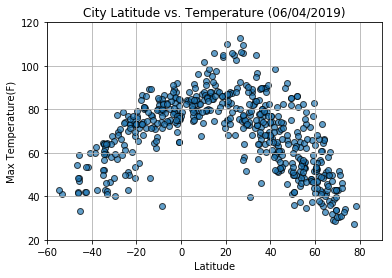

In [47]:
###
#Latitude vs Temperature Plot

# Build a scatter plot for each data type
plt.scatter(weather_data["Lat"], 
            weather_data["Max Temp (F)"],
            edgecolor="black", linewidths=1, marker="o", alpha=0.7)

# Incorporate the other graph properties
plt.title("City Latitude vs. Temperature (" + local_date + ")")
plt.ylabel("Max Temperature(F)")
plt.xlabel("Latitude")
plt.grid(True)
plt.xlim(-60,90)
plt.ylim([20, 120])

# Save the figure
plt.savefig("output_data/Latitude_Temperature.png")

# Show plot
plt.show()

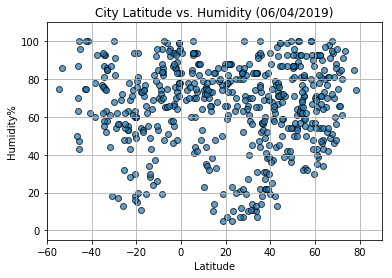

In [48]:
###
#Latitude vs. Humidity Plot
# Build a scatter plot for each data type
plt.scatter(weather_data["Lat"], 
            weather_data["Humidity"],
            edgecolor="black", linewidths=1, marker="o", alpha=0.7)

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity (" + local_date + ")")
plt.ylabel("Humidity%")
plt.xlabel("Latitude")
plt.grid(True)
plt.xlim([-60, 90])
plt.ylim([-5, 110])
# Save the figure
plt.savefig("output_data/Latitude_Humidity.png")

# Show plot
plt.show()


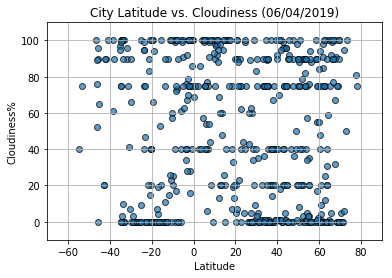

In [49]:
###
#Latitude vs. Cloudiness Plot
# Build a scatter plot for each data type
plt.scatter(weather_data["Lat"], 
            weather_data["Cloudiness"],
            edgecolor="black", linewidths=1, marker="o", alpha=0.7)

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness (" + local_date + ")")
plt.ylabel("Cloudiness%")
plt.xlabel("Latitude")
plt.grid(True)
plt.xlim([-70, 90])
plt.ylim([-10, 110])

# Save the figure
plt.savefig("output_data/Latitude_Cloudiness.png")

# Show plot
plt.show()

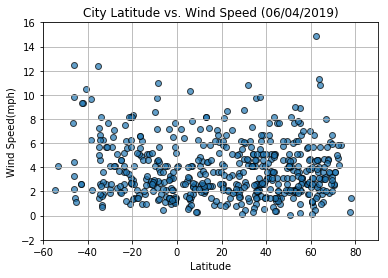

In [53]:
###
#Latitude vs. Wind Speed Plot
# Build a scatter plot for each data type
plt.scatter(weather_data["Lat"], 
            weather_data["Wind Speed"],
            edgecolor="black", linewidths=1, marker="o", alpha=0.7)

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed (" + local_date + ")")
plt.ylabel("Wind Speed(mph)")
plt.xlabel("Latitude")
plt.grid(True)
plt.xlim([-60, 90])
plt.ylim([-2, 16])

# Save the figure
plt.savefig("output_data/Latitude_WindSpeed.png")

# Show plot
plt.show()

In [16]:
weather_data.to_csv(output_data_file, sep=',', index=False)

In [17]:
print("The end")

The end


In [31]:
print("below are tests")

below are tests


In [32]:
###
url = "http://api.openweathermap.org/data/2.5/weather?"
#query_url = url + "appid=" + api_key + "&q=" + city
query_url = url + "appid=" + api_key + "&q=" 
cities = ["Paris", "London", "Oslo", "Beijing"]

# set up lists to hold reponse info
id = []
cityList = []
cloud = []
country = []
date = []
humidity =[]
lat = []
lon = []
tempMax_k = []
tempMax_f = []
windSpeed = []

# Loop through the list of cities and perform a request for data on each
for city in cities:
     response = requests.get(query_url + city).json()    
     id.append(response['id'])
     cityList.append(response['name'])
     cloud.append(response['clouds']['all'])
     country.append(response['sys']['country'])
     date.append(response['dt'])
     humidity.append(response['main']['humidity'])
     lat.append(response['coord']['lat'])
     lon.append(response['coord']['lon'])
     tempMax_k.append(response['main']['temp_max'])
     tempMax_f.append((response['main']['temp_max'] - 273.15)*9/5+32)
     windSpeed.append(response['wind']['speed'])


print(f"The latitude information received is: {lat}")
print(f"The temperature information received is: {tempMax}")


###
# create a data frame from cities, lat, and temp
weather_dict = {
    "city_id": id,
    "City": cityList,
    "Cloudiness": cloud,
    "Country": country,
    "Date": date,
    "Humidity": humidity,
    "Lat": lat,
    "Lng": lon,
    "Max Temp (Kelvin)": tempMax_k,
    "Max Temp (F)": tempMax_f,
    "Wind Speed": windSpeed
}
weather_data = pd.DataFrame(weather_dict)
weather_data.head()

The latitude information received is: [48.86, 51.51, 59.91, 39.91]
The temperature information received is: [301.48, 290.15, 292.59, 302.04]


,city_id,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp (Kelvin),Max Temp (F),Wind Speed
0,2988507,Paris,75,FR,1559658071,54,48.86,2.35,301.48,82.994,7.7
1,2643743,London,100,GB,1559658415,87,51.51,-0.13,289.82,62.006,5.1
2,3143244,Oslo,40,NO,1559658518,45,59.91,10.74,292.04,66.002,7.2
3,1816670,Beijing,0,CN,1559658635,77,39.91,116.39,302.04,84.002,1.0


In [23]:
print("test with one city: Lodon")

test with one city: Lodon


In [24]:
url = "http://api.openweathermap.org/data/2.5/weather?"
city = "London"
# Build query URL
query_url = url + "appid=" + api_key + "&q=" + city

###
# Get weather data
weather_response = requests.get(query_url)
weather_json = weather_response.json()

# Get the temperature from the response
print(f"The weather API responded with: {weather_json}.")

The weather API responded with: {'coord': {'lon': -0.13, 'lat': 51.51}, 'weather': [{'id': 521, 'main': 'Rain', 'description': 'shower rain', 'icon': '09d'}, {'id': 701, 'main': 'Mist', 'description': 'mist', 'icon': '50d'}], 'base': 'stations', 'main': {'temp': 288.36, 'pressure': 1003, 'humidity': 82, 'temp_min': 286.48, 'temp_max': 290.15}, 'visibility': 7000, 'wind': {'speed': 4.6, 'deg': 130}, 'clouds': {'all': 75}, 'dt': 1559657784, 'sys': {'type': 1, 'id': 1502, 'message': 0.0111, 'country': 'GB', 'sunrise': 1559620034, 'sunset': 1559679038}, 'timezone': 3600, 'id': 2643743, 'name': 'London', 'cod': 200}.


In [25]:
print(json.dumps(weather_json, indent=4, sort_keys=True))

{
    "base": "stations",
    "clouds": {
        "all": 75
    },
    "cod": 200,
    "coord": {
        "lat": 51.51,
        "lon": -0.13
    },
    "dt": 1559657784,
    "id": 2643743,
    "main": {
        "humidity": 82,
        "pressure": 1003,
        "temp": 288.36,
        "temp_max": 290.15,
        "temp_min": 286.48
    },
    "name": "London",
    "sys": {
        "country": "GB",
        "id": 1502,
        "message": 0.0111,
        "sunrise": 1559620034,
        "sunset": 1559679038,
        "type": 1
    },
    "timezone": 3600,
    "visibility": 7000,
    "weather": [
        {
            "description": "shower rain",
            "icon": "09d",
            "id": 521,
            "main": "Rain"
        },
        {
            "description": "mist",
            "icon": "50d",
            "id": 701,
            "main": "Mist"
        }
    ],
    "wind": {
        "deg": 130,
        "speed": 4.6
    }
}


In [26]:
print(f'city id is: {weather_json["id"]}')
print(f'city is: {weather_json["name"]}')
print(f'coord is: {weather_json["coord"]}')
print(f'lon is: {weather_json["coord"]["lon"]}')
print(f'lat is: {weather_json["coord"]["lat"]}')
print(f'country is: {weather_json["sys"]["country"]}')

city id is: 2643743
city is: London
coord is: {'lon': -0.13, 'lat': 51.51}
lon is: -0.13
lat is: 51.51
country is: GB


In [30]:
print(f'humidity is: {weather_json["main"]["humidity"]}')
print(f'max tempurature in Kelvin is: {weather_json["main"]["temp_max"]}')
print(f'max tempurature in F is: {(weather_json["main"]["temp_max"] - 273.15)*9/5+32}')
print(f'max wind speed is: {weather_json["wind"]["speed"]}')
print(f'clouds is: {weather_json["clouds"]["all"]}')
print(f'date is: {weather_json["dt"]}')

humidity is: 82
max tempurature in Kelvin is: 290.15
max tempurature in F is: 62.6
max wind speed is: 4.6
clouds is: 75
date is: 1559657784


In [22]:
print("end of the tests")

end of the tests


In [28]:
print("below are pre-provided")

below are pre-provided


In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

616

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | lompoc
Processing Record 2 of Set 1 | klaksvik
Processing Record 3 of Set 1 | bisignano
Processing Record 4 of Set 1 | bengkulu
City not found. Skipping...
Processing Record 5 of Set 1 | hilo
Processing Record 6 of Set 1 | rikitea
Processing Record 7 of Set 1 | ahipara
Processing Record 8 of Set 1 | lebu
Processing Record 9 of Set 1 | hamilton
Processing Record 10 of Set 1 | castro
Processing Record 11 of Set 1 | ashland
Processing Record 12 of Set 1 | ushuaia
Processing Record 13 of Set 1 | haines junction
Processing Record 14 of Set 1 | punta arenas
Processing Record 15 of Set 1 | salalah
Processing Record 16 of Set 1 | port macquarie
Processing Record 17 of Set 1 | mataura
Processing Record 18 of Set 1 | saint-philippe
Processing Record 19 of Set 1 | kaitangata
Processing Record 20 of Set 1 | souillac
Processing Record 21 of Set 1 | srednekolymsk
Processing Record 22 of Set 1 | busselton
Proce

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

City          547
Cloudiness    547
Country       547
Date          547
Humidity      547
Lat           547
Lng           547
Max Temp      547
Wind Speed    547
dtype: int64

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,lompoc,1,US,1534984500,44,34.64,-120.46,77.00,11.41
1,klaksvik,92,FO,1534983600,100,62.23,-6.59,50.00,13.87
2,bisignano,0,IT,1534981800,88,39.50,16.27,66.20,5.82
3,hilo,90,US,1534984860,90,19.71,-155.08,77.00,8.05
4,rikitea,8,PF,1534986579,100,-23.12,-134.97,69.58,19.71


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

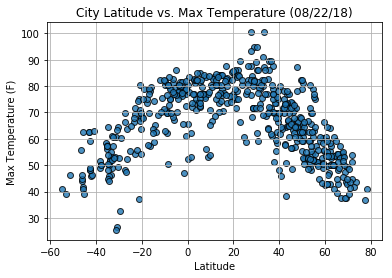

#### Latitude vs. Humidity Plot

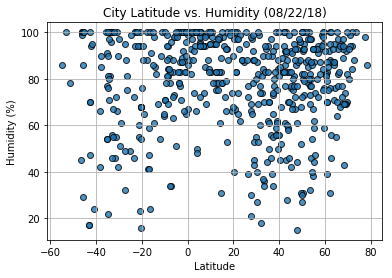

#### Latitude vs. Cloudiness Plot

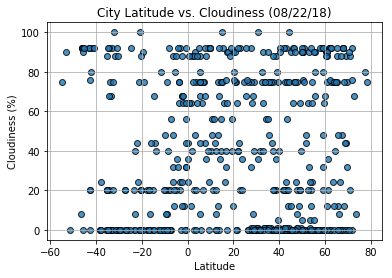

#### Latitude vs. Wind Speed Plot

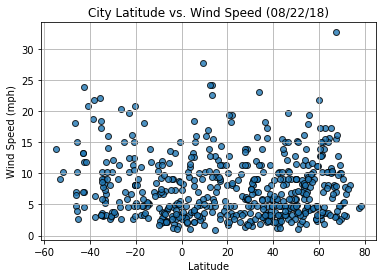